# Cervical Cancer Risk Classification


## Introduction<a id='itr'></a>

- Dataset Source

The dataset **Cervical Cancer Risk Classification** was source from [UCI Machine learning Repository]((https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29).



- Dataset Details

This dataset contains a list of cervical cancer risk factors that lead to a biopsy examination.

The data set was collected at the 'Hospital Universitario de Caracas' in Caracas, Venezuela. The data set comprises demographic information, habits, and medical histories of 858 patients. Several patients chose not to answer some of the questions due to privacy concerns (missing values).

- Data retrival

The dataset is downloaded from the UCI website and is saved as "kag_risk_factors_cervical_cancer.csv" in the local machine.



**Observation:**
- It has boolean values No=0, Si=1.

# Data Preparation & Visualization

## Load Modules

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,accuracy_score


## Data retrival

In [3]:
data_raw= pd.read_csv('kag_risk_factors_cervical_cancer.csv')
data_raw.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## Data Feature

tabulate() function displays tables in a friendly format and feature descriptions are easily visualized.

## Target Feature

For this project, the target feature in this dataset will be the `Biopsy`.

In [4]:
from tabulate import tabulate

table = [['Name','Data Type'],
         ['Age','Integer'],
         ['Number of sexual partners','Integer'],
         ['First sexual intercourse','Integer'],
         ['Num of pregnancies','Integer'],
         ['Smokes','Boolean'],
         ['Smokes (years)','Boolean'],
         ['Smokes (packs/year)','Boolean'],
         ['Hormonal Contraceptives','Boolean'],
         ['Hormonal Contraceptives (years)', 'Integer'],
         ['IUD','Boolean'],
         ['IUD (years)','Integer'],
         ['STDs','Boolean'],
         ['STDs (number)','Integer',],
         ['STDs:condylomatosis','Boolean'],
         ['STDs:cervical condylomatosis','Boolean'],
         ['STDs:vaginal condylomatosis','Boolean'],
         ['STDs:vulvo-perineal condylomatosis','Boolean'],
          ["STDs:syphilis", 'Boolean'],
         ['STDs:pelvic inflammatory disease', 'Boolean'],
         ['STDs:genital herpes', 'Boolean'],
         ['STDs:molluscum contagiosum','Boolean'],
         ['STDs:AIDS','Boolean'],
         ['STDs:HIV','Boolean'],
         ['STDs:Hepatitis B','Boolean'],
         ['STDs:HPV','Boolean'],
         ['STDs: Number of diagnosis', 'Integer'],
         ['STDs: Time since first diagnosis', 'Integer'],
         ['STDs: Time since last diagnosis', 'Integer'],
         [' Dx:Cancer', 'Boolean'],
         [' Dx:CIN', 'Boolean'],
         ['Dx:HPV', 'Boolean'],
         ['Dx','Boolean'],
         ['Hinselmann', 'Boolean'],
         ['Schiller', 'Boolean'],
         ['Cytology','Boolean'],
         ['Biopsy', 'Boolean']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════════════════╤═════════════╕
│ Name                               │ Data Type   │
╞════════════════════════════════════╪═════════════╡
│ Age                                │ Integer     │
├────────────────────────────────────┼─────────────┤
│ Number of sexual partners          │ Integer     │
├────────────────────────────────────┼─────────────┤
│ First sexual intercourse           │ Integer     │
├────────────────────────────────────┼─────────────┤
│ Num of pregnancies                 │ Integer     │
├────────────────────────────────────┼─────────────┤
│ Smokes                             │ Boolean     │
├────────────────────────────────────┼─────────────┤
│ Smokes (years)                     │ Boolean     │
├────────────────────────────────────┼─────────────┤
│ Smokes (packs/year)                │ Boolean     │
├────────────────────────────────────┼─────────────┤
│ Hormonal Contraceptives            │ Boolean     │
├────────────────────────────────────┼────────

## **Observation:**
- It has boolean values No=0, Si=1.

# Data Cleaning and Preprocessing

In this section, I will describe the data cleaning and preprocessing steps undertaken for this project in order to refine the dataset for further analysis.

### Data Cleaning Steps

- First, it is necessary to know datatype which should match with data description (see Data Feature section).
- Looking for missing values and checking if the column names are labeled correctly. These steps are important because missing values could result in bias and draw wrong conclusions. Namely correctly allows to easy to identify features characteristic.


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
print('There are ', data_raw.shape[0], "rows.")
print('There are ', data_raw.shape[1], "columns.")

There are  858 rows.
There are  36 columns.


- Some features appear to have been assigned incorrectly data types and require additional conversion.

- `No-Null Count` indicates that there is not missing values.In order to verify if there is not missing values the following function  `isnull().sum()` will display how many missing values are in each feature.

In [7]:
data_raw.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


Some attributes has a missing values, i.e. There is some place with "?". Therefore, it will be replace by NaN in order to count how many missing value are on each attribute.


### Handle Missing Values

In [8]:
data_raw= data_raw.replace('?', np.nan)

In [9]:
data_raw.isnull().sum().sort_values(ascending=False)

STDs: Time since last diagnosis       787
STDs: Time since first diagnosis      787
IUD                                   117
IUD (years)                           117
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
STDs:pelvic inflammatory disease      105
STDs:vulvo-perineal condylomatosis    105
STDs:HPV                              105
STDs:Hepatitis B                      105
STDs:HIV                              105
STDs:AIDS                             105
STDs:molluscum contagiosum            105
STDs:genital herpes                   105
STDs:syphilis                         105
STDs:vaginal condylomatosis           105
STDs:cervical condylomatosis          105
STDs:condylomatosis                   105
STDs (number)                         105
STDs                                  105
Num of pregnancies                     56
Number of sexual partners              26
Smokes (packs/year)                    13
Smokes (years)                    

In [10]:
missing_values= pd.DataFrame((data_raw.isnull().sum().sort_values(ascending=True)/data_raw.shape[0]))
missing_values=missing_values.rename(columns={0: 'Percentage'})
missing_values = missing_values.reset_index().rename(columns = {'index':'Column name'})


fig = px.bar(
    data_frame=missing_values,
    x='Percentage',
    y='Column name',
    title='Missing Values in all Columns',
    template="seaborn")

fig.show()

**Observations:**
- "STDs: Time since last diagnosis" and "STDs: Time since first diagnosis" have more that 80% of missing values, I can drop them.

- Before, handle the rest of missing values, let's transforms all attributes into numeric.

-After handle data type,  I can apply statistical method to fill it out the dataframe where are missing values.


In [11]:
data_raw.drop(['STDs: Time since last diagnosis','STDs: Time since first diagnosis'], axis=1, inplace=True)

In [12]:
data_raw=data_raw.apply(pd.to_numeric)
data_raw.head(3)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [13]:
# Missing values will be filled it out with the mode
data_clean= data_raw.fillna(data_raw.mode().iloc[0])

In [14]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [15]:
data_clean.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


### **Observation**

-There is not missing values
- Missing values were filled it out with the mode.
- data_clean is the new dataframe ready for further explorations.

#  Exploratory Data Analysis (EDA)

## Sumary Statistics
The next step is to determine the summary of each feature which will display unique values, frequency, total elements and the top values on each feature.

In [16]:
#Describe numerical data
data_clean.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.979021,2.192308,0.143357,1.201241,0.446278,0.686480,1.972394,0.096737,...,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.797653,1.434395,0.350641,4.060623,2.210351,0.464194,3.597888,0.295771,...,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **Observation**

- Age col: min= 13 year old and max=84
- Number of sexual partners  col:  max= 28, this number look to be out range. Let explore in further details below.


## Data Visualization

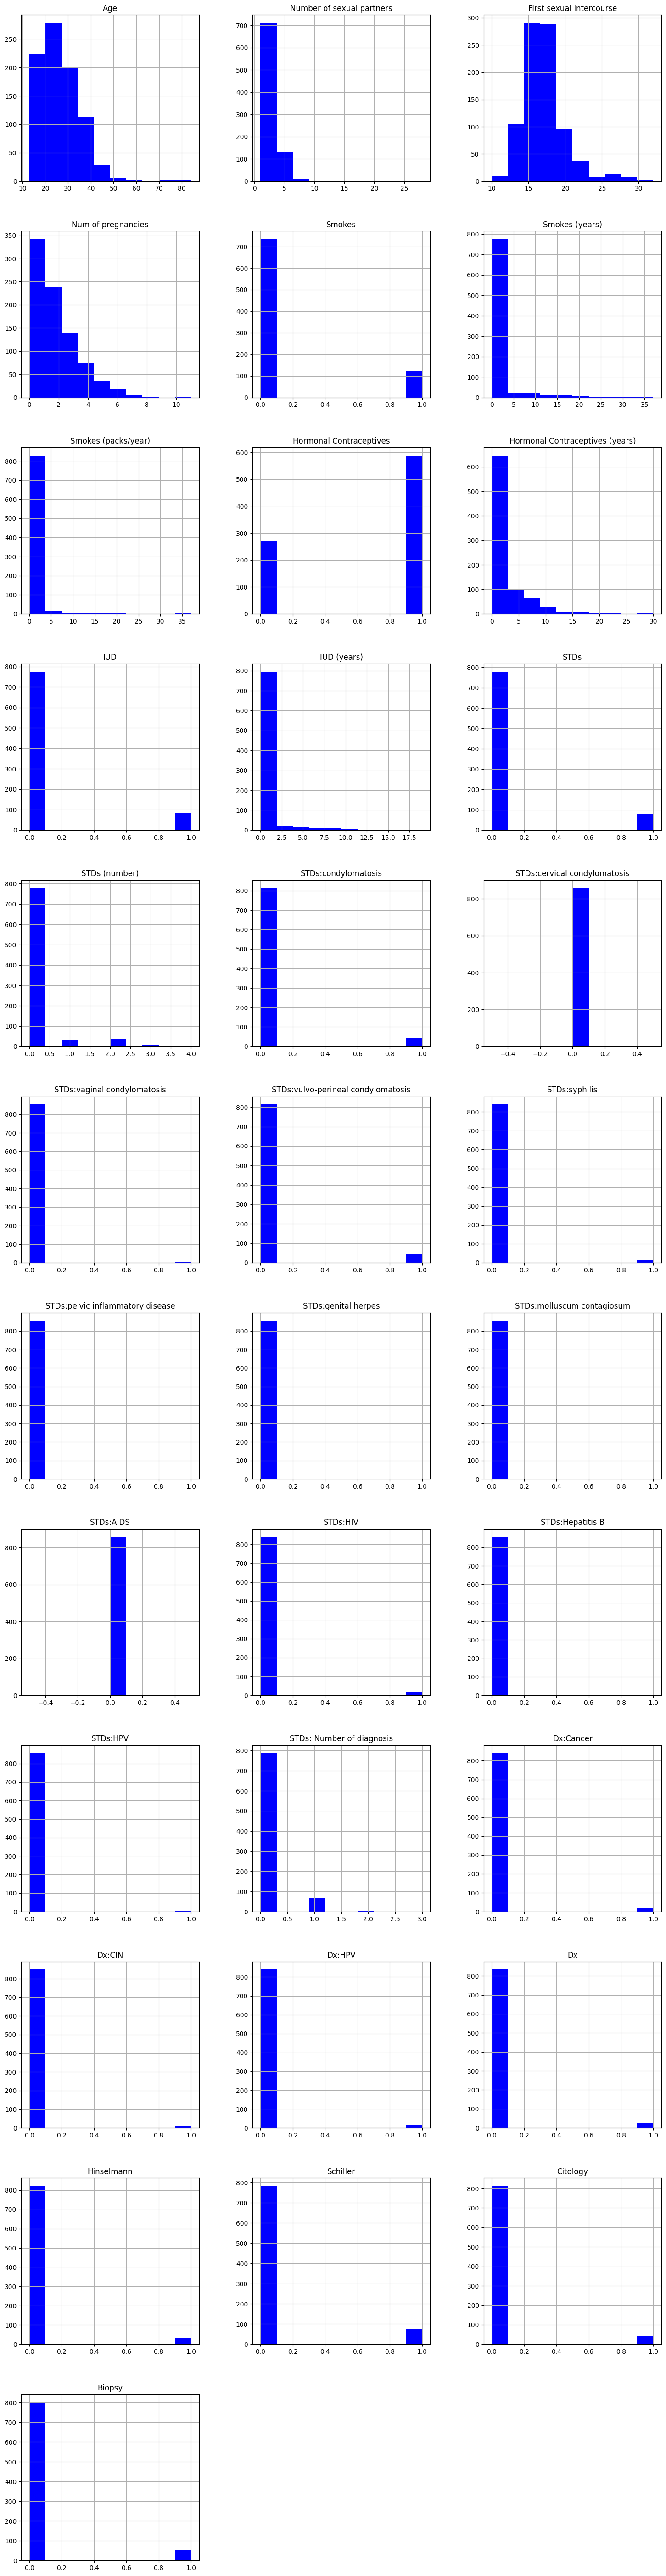

In [17]:
num_cols = 3  # Number of columns
num_rows = (data_clean.shape[1] + num_cols - 1) // num_cols  # Number of rows

# Plot histograms with adjusted size
data_clean.hist(bins=10, figsize=(num_cols * 6, num_rows * 6), color='b', layout=(num_rows, num_cols))
plt.show()

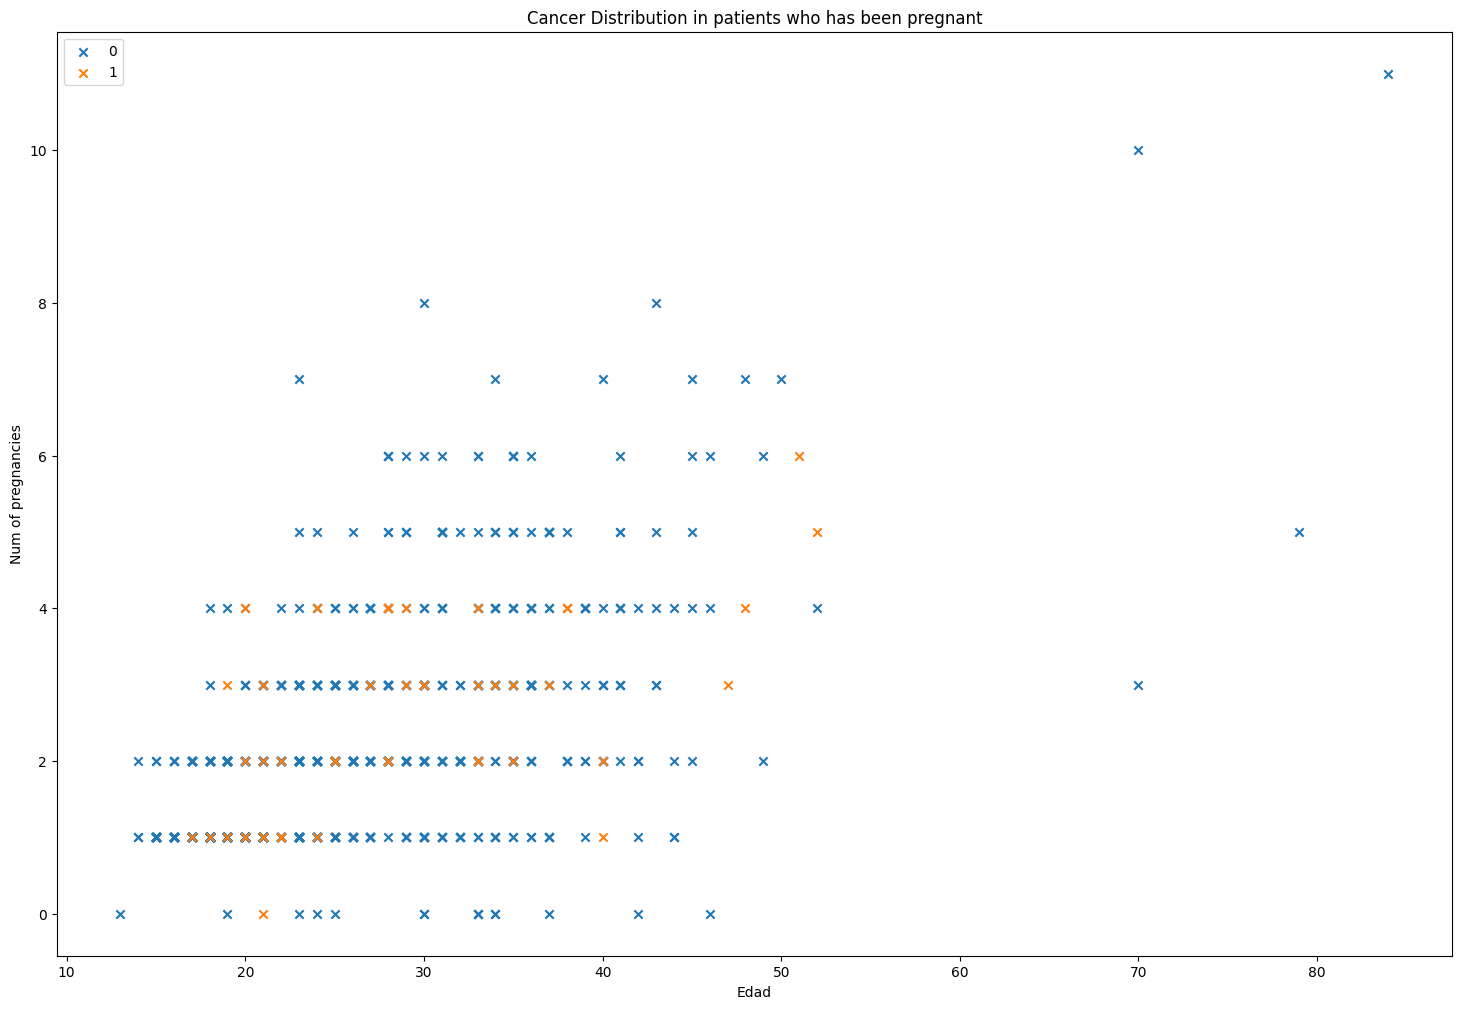

In [18]:
plt.figure(figsize=(18,12))
for target_explorar in range(2):
    target_data = data_raw[data_clean ['Biopsy'] == target_explorar]
    plt.scatter(target_data['Age'], target_data['Num of pregnancies'], marker="x", label=target_explorar)

plt.xlabel('Edad')
plt.ylabel('Num of pregnancies')
plt.title('Cancer Distribution in patients who has been pregnant')
plt.legend()
plt.show()

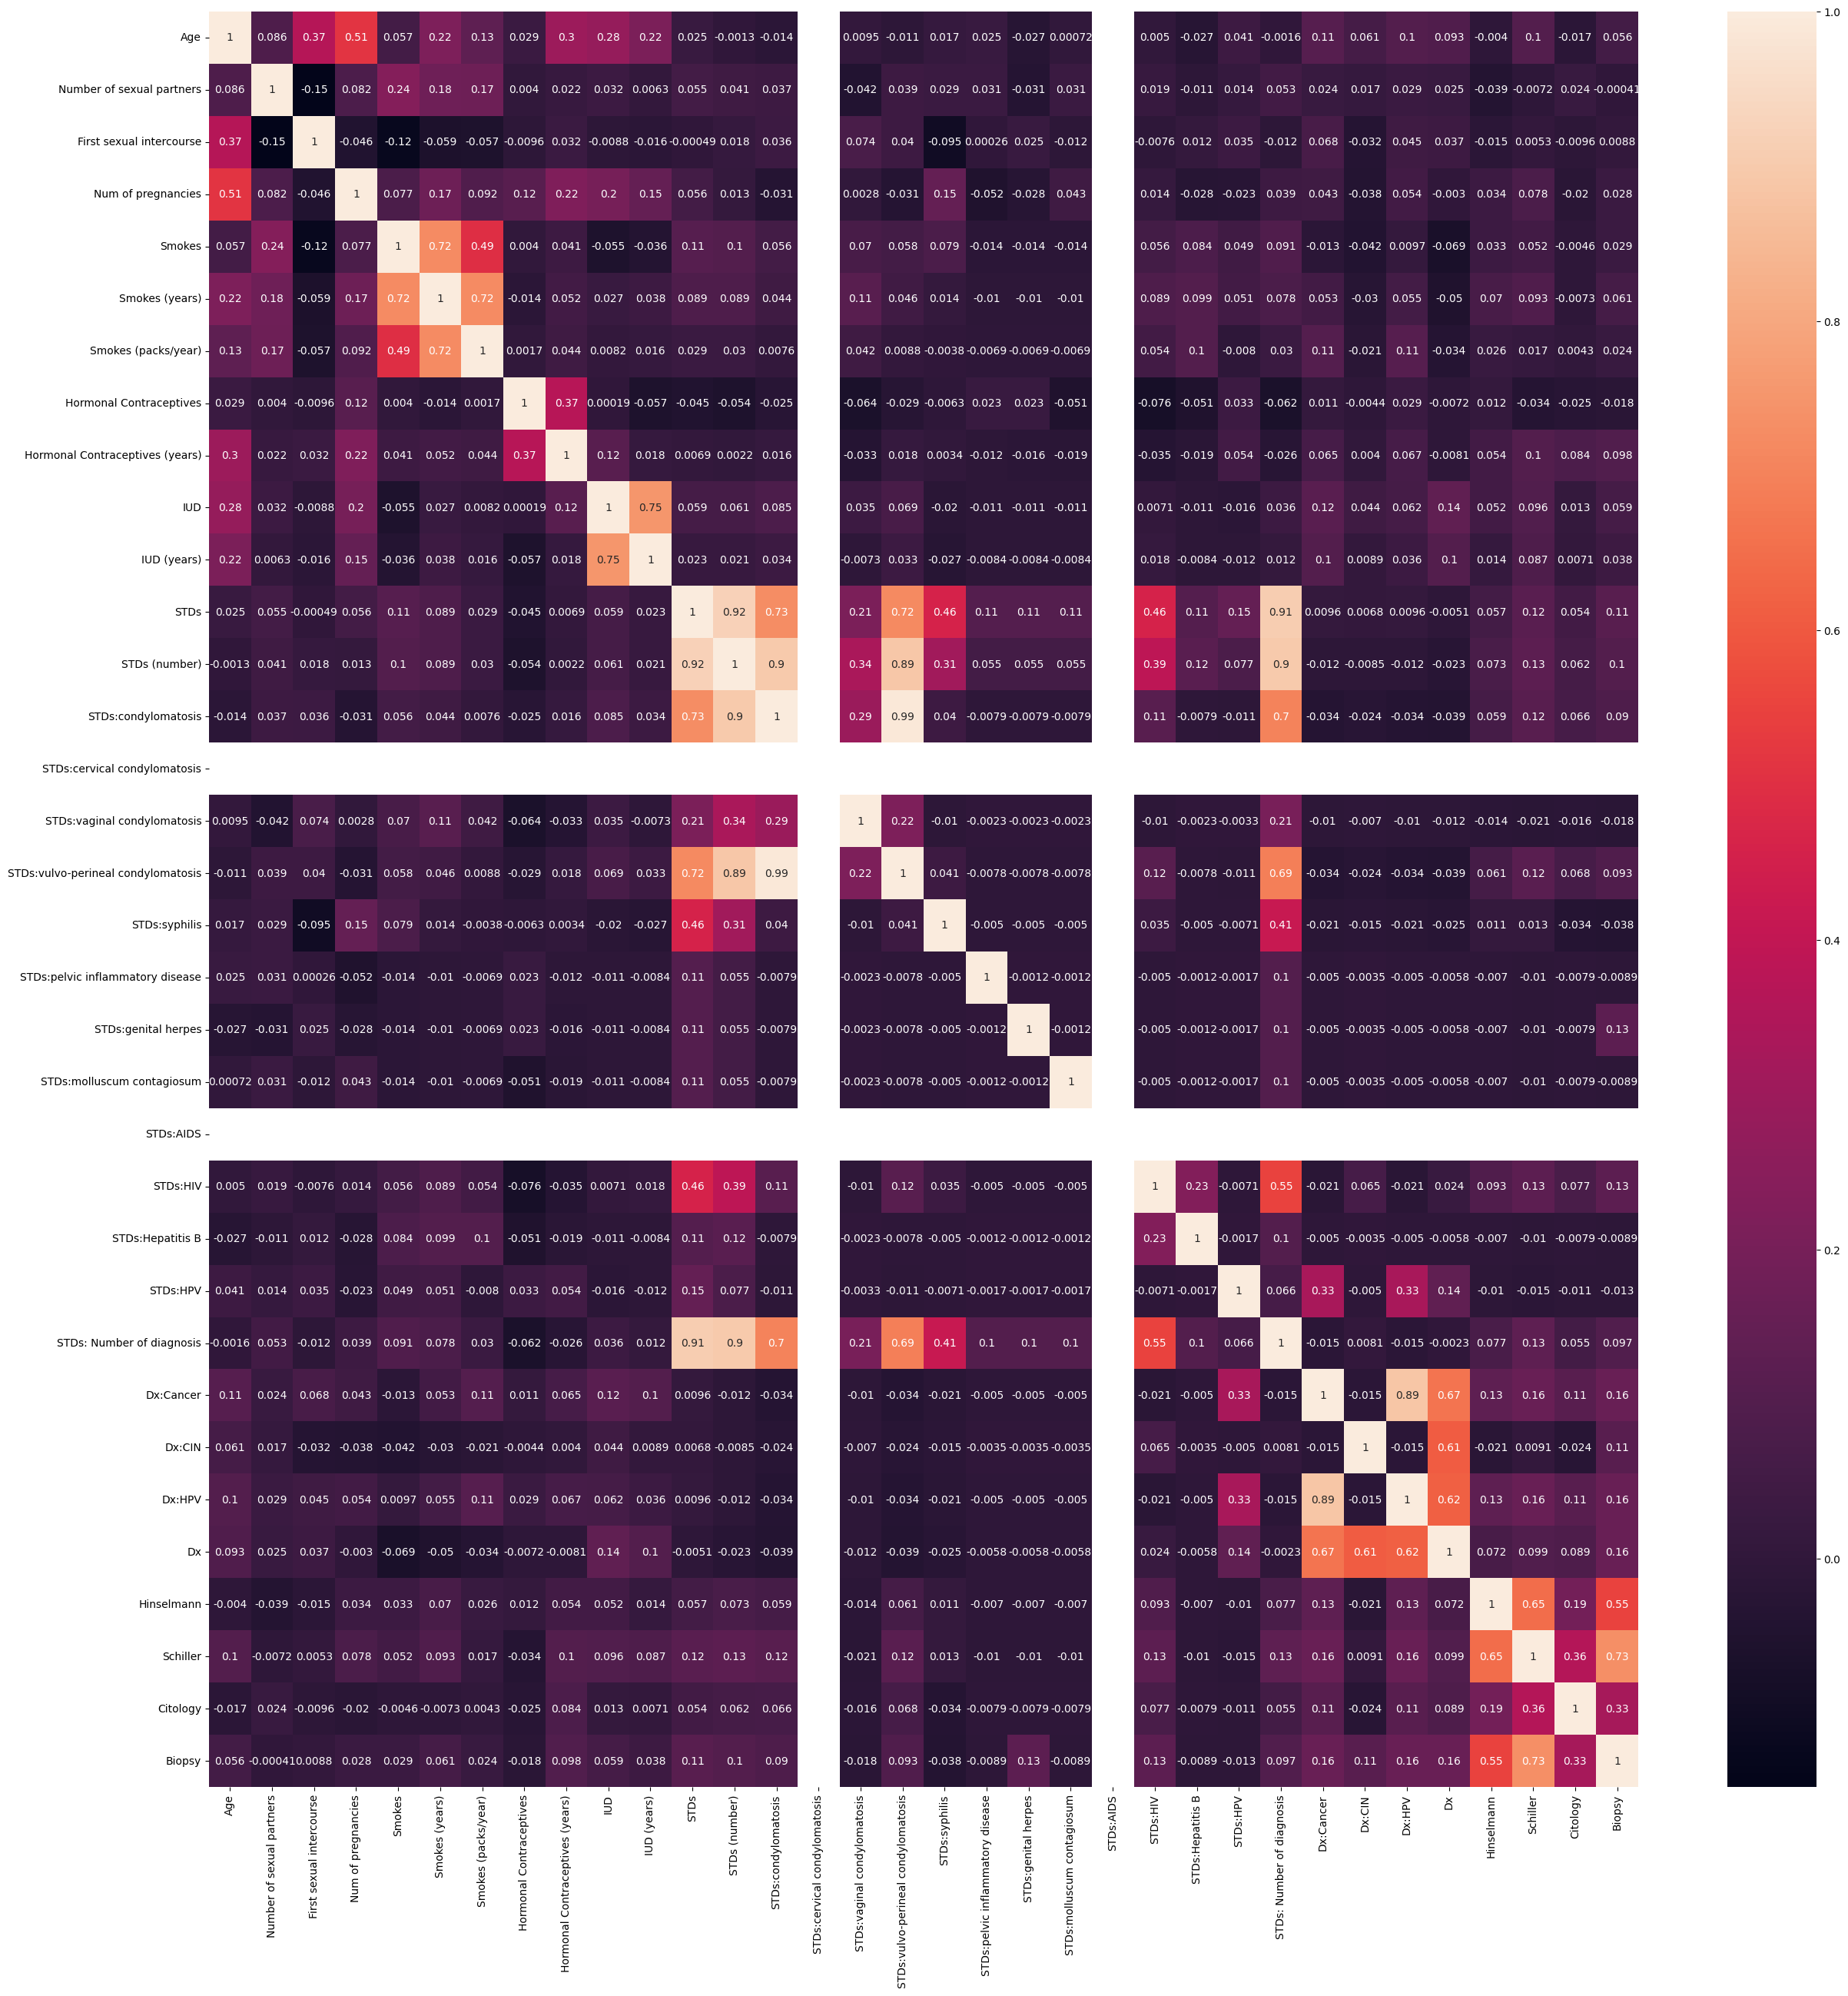

In [19]:
plt.figure(figsize = (30,30))
sns.heatmap(data_clean.corr(), annot = True)
plt.show()

## Obsevations:

- The bar chart indicates that predominates people without smoking habits or being diagnosticate with cancer.

-Biopsy is the target, but the plot indicates an unbalance data information. Therefore, it is necessary handle imbalanced dataset and select the proper metrics.

Therefore, I will select the following metrics:
  - Accuracy
  - Precision
  - Recall
 

- The scatter plot display that increasing the number of being pregnant indicates that is likely to being diagnosticate with cancer. Additionatilly, it's also affected by the age.

# Split Data

In [20]:
df=data_clean.copy()

In [21]:
X = df.drop(columns=['Biopsy'])
y = df['Biopsy']

# Handle imbalanced Dataset

In [22]:
sampler_methd = RandomOverSampler(random_state=0)
X_resampled, y_resampled = sampler_methd.fit_resample(X, y)

print("Before oversampling: ")
print(y.value_counts())

print("After oversampling: ")
print(y_resampled.value_counts())

Before oversampling: 
0    803
1     55
Name: Biopsy, dtype: int64
After oversampling: 
0    803
1    803
Name: Biopsy, dtype: int64


# Classification Models

## Logistic regression model

The target `Biopsy` contained binary data and **Logistic Regression" is a statistical technique for binary classification.
Additionally, Logistic regression provides easily interpretable results. The output of logistic regression is a probability score between 0 and 1, representing the likelihood of the input belonging to the positive class. This probability can be easily interpreted in many contexts.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=64)

Let's select the optimal parameter.

In [24]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

lr = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_resampled, y_resampled)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.9781907044481308


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

The best parameters for Logistic Regression.


In [25]:
table = [['Parameter','Value'],
         ['C','1'],
         ['Penalty','l1'],
         ['Solver','liblinear']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════╤═══════════╕
│ Parameter   │ Value     │
╞═════════════╪═══════════╡
│ C           │ 1         │
├─────────────┼───────────┤
│ Penalty     │ l1        │
├─────────────┼───────────┤
│ Solver      │ liblinear │
╘═════════════╧═══════════╛


In [26]:
regression = LogisticRegression(C=1, penalty='l1', solver='liblinear')
regression.fit(X_train, y_train)
accuracy=regression.score(X_test, y_test)

### Model Evaluation

In [27]:
print(classification_report(y_test, regression.predict(X_test)))
print("Logistic Regression Accuracy: ", accuracy)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       228
           1       0.96      0.93      0.94       254

    accuracy                           0.94       482
   macro avg       0.94      0.94      0.94       482
weighted avg       0.94      0.94      0.94       482

Logistic Regression Accuracy:  0.941908713692946


## KNN classification model

Select the best "k" value.

In [28]:
acc_scores = []
acc_scores_box = []
k_values = range(1,11)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=10, scoring='accuracy')
    acc_scores.append(scores.mean())
    acc_scores_box.append(scores)

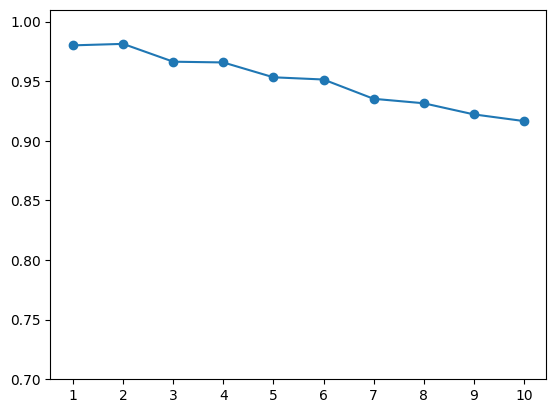

In [29]:
plt.plot(k_values, acc_scores, marker='o')
plt.ylim(0.7,1.01)
plt.xticks(range(1,11))
plt.show()

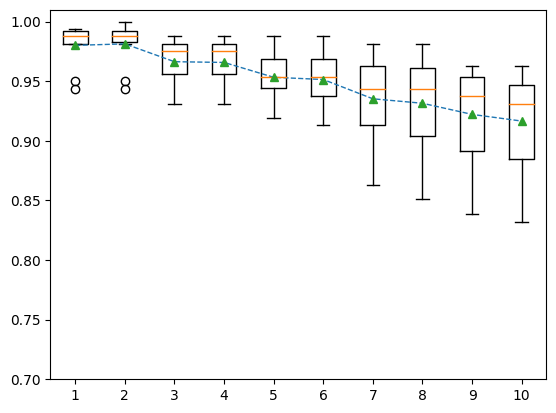

In [30]:
plt.boxplot(acc_scores_box, showmeans=True, positions=range(1,11))
plt.plot(k_values, acc_scores, linestyle="--", linewidth=1)
plt.ylim(0.7,1.01)
plt.xticks(range(1,11))
plt.show()

Therefore, *k* is chosen as the one that has a maximum value in the selected metric.

In [31]:
k_optimum = k_values[acc_scores.index(max(acc_scores))]
k_optimum

2

In [32]:
knn = KNeighborsClassifier(n_neighbors=k_optimum, weights='distance').fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Model Evaluation


In [33]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       228
           1       0.97      1.00      0.98       254

    accuracy                           0.98       482
   macro avg       0.98      0.98      0.98       482
weighted avg       0.98      0.98      0.98       482



In [34]:
accuracy=knn.score(X_test, y_test)
print('KNN accuracy: ',accuracy)

KNN accuracy:  0.983402489626556


## Support Vector Machine (SVM) Model

Select the best parameters.

In [35]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

svm = SVC(max_iter=1000)


grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_resampled, y_resampled)


print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación (ROC AUC):", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScal

Mejores parámetros: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mejor puntuación (ROC AUC): 1.0


The best parameters for SVM.

In [36]:
table = [['Parameter','Value'],
         ['C','0.1'],
         ['gamma','1'],
         ['kernerl', 'rbf']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════╤═════════╕
│ Parameter   │ Value   │
╞═════════════╪═════════╡
│ C           │ 0.1     │
├─────────────┼─────────┤
│ gamma       │ 1       │
├─────────────┼─────────┤
│ kernerl     │ rbf     │
╘═════════════╧═════════╛


In [37]:
#Create a svm Classifier
clf = SVC(C=0.1, gamma=1, kernel='rbf')

clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Model Evaluation

In [38]:
print(classification_report(y_test,clf.predict(X_test)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       228
           1       1.00      0.78      0.88       254

    accuracy                           0.88       482
   macro avg       0.90      0.89      0.88       482
weighted avg       0.91      0.88      0.88       482

Accuracy: 0.8838174273858921


# Conclusion
KNN model was the best to predict Biopsy=1. 